In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('ggplot')

In [6]:
url2 = "https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data2.txt"
data2 = pd.read_csv(url2, header=None, names=['Size', 'Bedrooms', 'Price'])
print data2.head(), "\n"
print data2.describe()

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900 

              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [7]:
# normalization
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [9]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [12]:
# add ones column
data2.insert(0, 'Ones', 1)

In [13]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [14]:
alpha = 0.01
iters = 1000

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

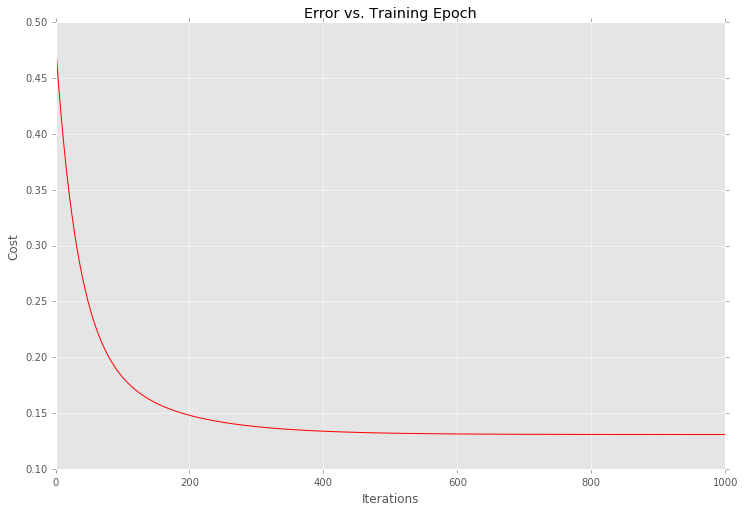

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

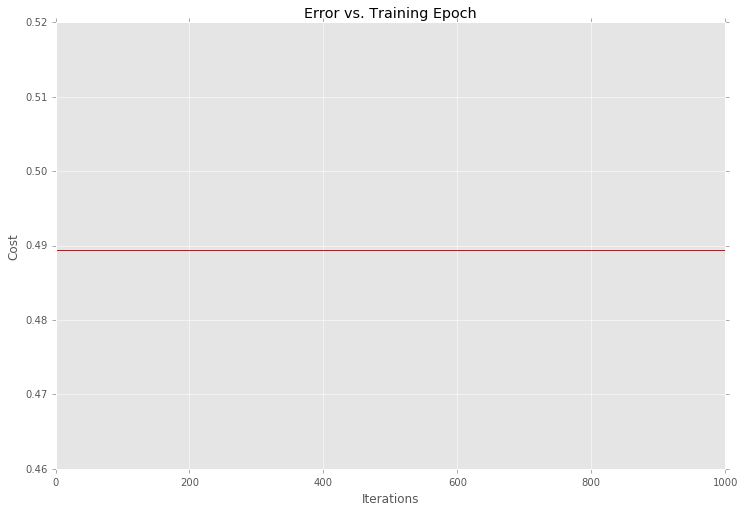

In [17]:
# what if alpha = 1?
alpha = 1
iters = 1000
theta = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

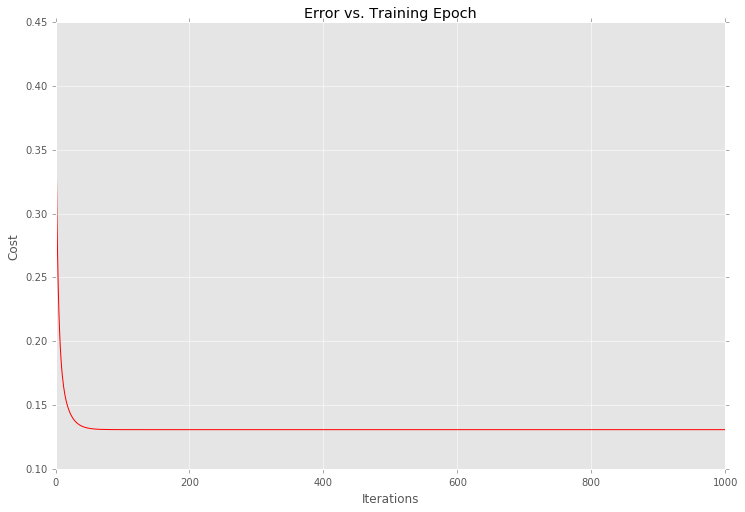

In [18]:
# what if alpha = 0.1?
alpha = 0.1
iters = 1000
theta = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

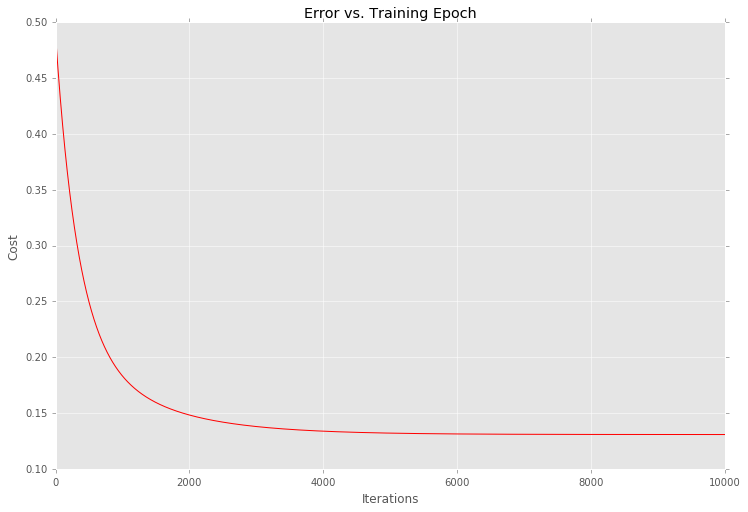

In [20]:
# what if alpha = 0.001?
alpha = 0.001
# iters = 1000
iters = 10000
theta = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### sklearn

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X2, y2)

model2 = linear_model.LinearRegression(normalize = True)
model2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [27]:
f2 = model.predict(X2).flatten()
print f2[:5]

f3 = model2.predict(X2).flatten()
print f3[:5]

[ 0.12692309 -0.43419524  0.45646878 -0.56916611  1.05458494]
[ 0.12692309 -0.43419524  0.45646878 -0.56916611  1.05458494]
